In [21]:
# Reading from FRED and French
## Downloading M2REAL Excel spreadsheet

In [22]:
import pandas as pd
filename = 'M2REAL.xls'
m2_df = pd.read_excel(filename, sheet_name='FRED Graph', header=10)
print(f'Read in {len(m2_df)} records from {filename}.')
m2_df.head()

Read in 755 records from M2REAL.xls.


,observation_date,M2REAL
0,1959-01-01,987.9
1,1959-02-01,992.1
2,1959-03-01,998.3
3,1959-04-01,1001.0
4,1959-05-01,1006.2


In [23]:
m2_df['observation_date']

0     1959-01-01
1     1959-02-01
2     1959-03-01
3     1959-04-01
4     1959-05-01
         ...    
750   2021-07-01
751   2021-08-01
752   2021-09-01
753   2021-10-01
754   2021-11-01
Name: observation_date, Length: 755, dtype: datetime64[ns]

In [24]:
filename = 'F-F_Research_Data_Factors.CSV'
ff_df = pd.read_csv(filename, skiprows=2)
print(f'Read in {len(ff_df)} records from {filename}.')
ff_df.head()

Read in 1242 records from F-F_Research_Data_Factors.CSV.


,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.38,-2.73,0.22
1,192608,2.64,-1.47,4.14,0.25
2,192609,0.36,-1.39,0.12,0.23
3,192610,-3.24,-0.13,0.65,0.32
4,192611,2.53,-0.16,-0.38,0.31


In [25]:
# Let's rename that first col to yyyymm
ff_df.rename(columns={"Unnamed: 0": "yyyymm", "Mkt-RF": "Mkt_minus_RF"}, inplace=True)
ff_df.tail()

,yyyymm,Mkt_minus_RF,SMB,HML,RF
1237,2017,21.51,-4.95,-13.48,0.80
1238,2018,-6.93,-3.34,-9.80,1.81
1239,2019,28.28,-6.06,-10.48,2.14
1240,2020,23.67,12.78,-46.31,0.44
1241,Copyright 2021 Kenneth R. French,NaN,NaN,NaN,NaN


# We need to do some data cleansing

Drop N/As

In [26]:
# Length before?
print(f'Len at the beginning: {len(ff_df)}')

Len at the beginning: 1242


In [27]:
ff_df.dropna(axis='index', how='any', subset=['Mkt_minus_RF', 'SMB', 'HML', 'RF'], inplace=True)
print(f'Len after dropping NA: {len(ff_df)}')

Len after dropping NA: 1240


In [28]:
ff_df['yyyymm'] # dtype: object
# pd.to_numeric(ff_df['yyyymm'])  # Coerce to an int
ff_df['yyyymm'] = ff_df['yyyymm'].astype(str) # Coerce to a string
ff_df['yyyymm']

0       192607
1       192608
2       192609
3       192610
4       192611
         ...  
1236      2016
1237      2017
1238      2018
1239      2019
1240      2020
Name: yyyymm, Length: 1240, dtype: object

In [29]:
# Drop if the yyyymm is just a year.
ff_df.index # 0, 1, ... , 1240
ff_df.iloc[range(1140, 1153)] # 1144 is the last one we want. drop 1146 to 1240
ff_df.tail() #1240 is our last, but range needs 1 more
ff_df.drop(range(1146, 1241), inplace=True)
print(f'Len after dropping yyyy: {len(ff_df)}')
ff_df.tail()

Len after dropping yyyy: 1145


,yyyymm,Mkt_minus_RF,SMB,HML,RF
1140,202107,1.27,-3.96,-1.75,0.00
1141,202108,2.90,-0.48,-0.13,0.00
1142,202109,-4.37,0.80,5.09,0.00
1143,202110,6.65,-2.28,-0.44,0.00
1144,202111,-1.55,-1.35,-0.52,0.00


In [30]:
# Pandas to datetime: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
# Parsing datetime:   https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
ff_df['Date'] = pd.to_datetime(ff_df.yyyymm, format='%Y%m')


In [32]:
# Drop the old yyyymm column 
ff_df.drop(columns='yyyymm', inplace=True)
# Make the Date an index field
ff_df.set_index('Date', inplace=True)
ff_df

,Mkt_minus_RF,SMB,HML,RF
Date,,,,
1926-07-01,2.96,-2.38,-2.73,0.22
1926-08-01,2.64,-1.47,4.14,0.25
1926-09-01,0.36,-1.39,0.12,0.23
1926-10-01,-3.24,-0.13,0.65,0.32
1926-11-01,2.53,-0.16,-0.38,0.31
...,...,...,...,...
2021-07-01,1.27,-3.96,-1.75,0.00
2021-08-01,2.90,-0.48,-0.13,0.00
2021-09-01,-4.37,0.80,5.09,0.00


# Data Visualization

## Matplotlib and pyplot

Comes from Matlab

Reference: https://matplotlib.org/stable/tutorials/introductory/usage.html

### lines

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:

x = np.array(np.arange(1,11)) # 1 .. 10
y = np.array(np.arange(2, 39, 4)) # 2 .. 38
y
#print(f'b is a matrix\n {b} \nwith a shape of {b.shape}')

array([ 2,  6, 10, 14, 18, 22, 26, 30, 34, 38])

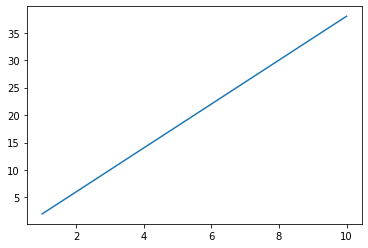

In [13]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(x, y);  # Plot some data on the axes.

In [14]:
x = np.linspace(0, 2 * np.pi, 9) # unit circle: 0 to 2*pi in 8
y = np.sin(x)  # Caclulate sin(x) for each point in the vector
y

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16])

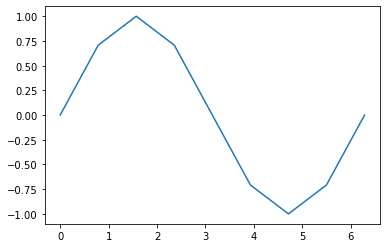

In [15]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(x, y)

## pyplot

"matplotlib.pyplot is a state-based interface to matplotlib"

Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

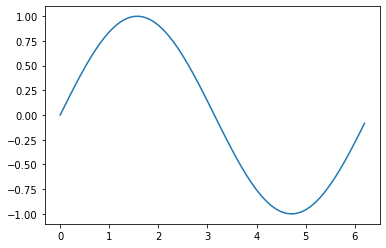

In [16]:
import matplotlib.pyplot as plt

x = np.arange(0, 2.0 * np.pi, 0.1)
y = np.sin(x)
plt.plot(x, y)

## bar charts 

Bar chart for graphics cards.

Source for high-end graphics cards: https://www.videocardbenchmark.net/high_end_gpus.html
        
Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
        
Helpful example: https://pythonspot.com/matplotlib-bar-chart/

In [17]:
graphics_data = {
    'Videocard': ['GeForce RTX 3080 Ti', 'GeForce RTX 3090', 'Radeon RX 6900 XT', 'GeForce RTX 3080', 'RTX A5000', ],
    'G3D_mark': [26677, 26054, 25344, 24544, 23583,],
    'Price': [2023.02, 3097.93, 1759.99, 3799.99, np.nan, ]
                }
graphics_df = pd.DataFrame(graphics_data)
graphics_df

,Videocard,G3D_mark,Price
0,GeForce RTX 3080 Ti,26677,2023.02
1,GeForce RTX 3090,26054,3097.93
2,Radeon RX 6900 XT,25344,1759.99
3,GeForce RTX 3080,24544,3799.99
4,RTX A5000,23583,NaN


In [18]:
cards = list(graphics_df.Videocard)
benchmark = list(graphics_df.G3D_mark)
y_pos = np.arange(len(cards)) # simple array([0, 1, 2, 3, 4])
y_pos

array([0, 1, 2, 3, 4])

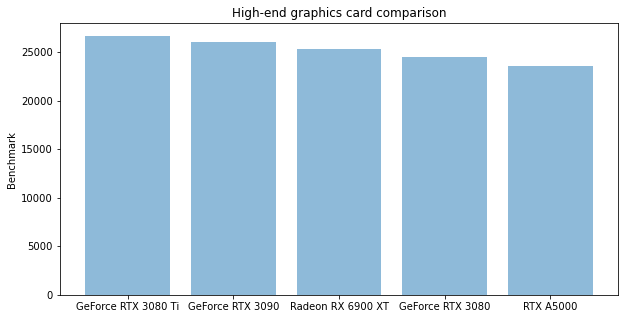

In [19]:
fig = plt.figure(figsize = (10, 5)) # or the words get smashed together
plt.bar(y_pos, benchmark, align='center', alpha=0.5)
plt.xticks(y_pos, cards)
plt.ylabel('Benchmark')
plt.title('High-end graphics card comparison')

plt.show()

# Seaborn

Depends on Matplotlib and its way of plotting.

Reference: https://seaborn.pydata.org/tutorial.html

Gallery: https://seaborn.pydata.org/examples/index.html

Official intro: https://seaborn.pydata.org/introduction.html

Tutorial: https://www.geeksforgeeks.org/python-seaborn-tutorial/

An in-joke (and why we `import seaborn as sns`): https://stackoverflow.com/questions/41499857/seaborn-why-import-as-sns

In [20]:
import seaborn as sns 
import matplotlib.pyplot as plt 

<AxesSubplot:>

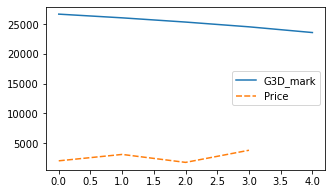

In [25]:
plt.figure(figsize = (5, 3)) # 5 inches by 3 inches
sns.lineplot(data=graphics_df) # Using the dataframe as input

In [29]:
# slightly longer graphics card example
filename = "graphics_cards.xlsx"
graphics2_df = pd.read_excel(filename, sheet_name='graphics')
graphics2_df

,Videocard,pctg,G3D Mark,Price
0,Radeon RX 6900 XT,-0.82,25344,1759.99
1,GeForce RTX 3080,-0.80,24544,3799.90
2,RTX A5000,-0.76,23583,NaN
3,Radeon RX 6800 XT,-0.75,23058,1478.87
4,GeForce RTX 3070 Ti,-0.73,22651,1268.29
5,RTX A6000,-0.73,22563,4999.00
6,GeForce RTX 3070,-0.71,21934,1097.19
7,GeForce RTX 2080 Ti,-0.70,21716,1291.94
8,Radeon RX 6800,-0.67,20768,1529.99


In [33]:
graphics2_df.dropna(how='any', inplace=True)
graphics2_df.drop(columns='pctg', inplace=True)
graphics2_df

,Videocard,G3D Mark,Price
0,Radeon RX 6900 XT,25344,1759.99
1,GeForce RTX 3080,24544,3799.90
3,Radeon RX 6800 XT,23058,1478.87
4,GeForce RTX 3070 Ti,22651,1268.29
5,RTX A6000,22563,4999.00
6,GeForce RTX 3070,21934,1097.19
7,GeForce RTX 2080 Ti,21716,1291.94
8,Radeon RX 6800,20768,1529.99


In [36]:
vid_col = list(graphics2_df.Videocard) # ['Radeon RX 6900 XT', ... 'Radeon RX 6800']
new_col = []
for el in vid_col:
    if 'Radeon' in el:
        append_me = 'Radeon'
    elif 'GeForce' in el:
        append_me = 'GeForce'
    else:
        append_me = 'other'
    new_col.append(append_me)
new_col

['Radeon',
 'GeForce',
 'Radeon',
 'GeForce',
 'other',
 'GeForce',
 'GeForce',
 'Radeon']

In [37]:
graphics2_df['Brand'] = new_col
graphics2_df

,Videocard,G3D Mark,Price,Brand
0,Radeon RX 6900 XT,25344,1759.99,Radeon
1,GeForce RTX 3080,24544,3799.90,GeForce
3,Radeon RX 6800 XT,23058,1478.87,Radeon
4,GeForce RTX 3070 Ti,22651,1268.29,GeForce
5,RTX A6000,22563,4999.00,other
6,GeForce RTX 3070,21934,1097.19,GeForce
7,GeForce RTX 2080 Ti,21716,1291.94,GeForce
8,Radeon RX 6800,20768,1529.99,Radeon


# Let's look at the graphics2_df

Reference: https://seaborn.pydata.org/tutorial/categorical.html

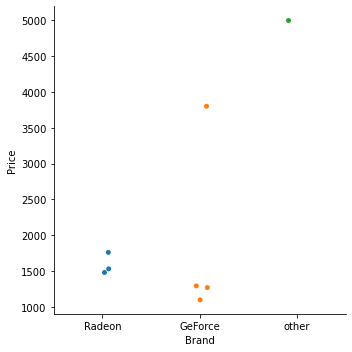

In [38]:
sns.catplot(x="Brand", y="Price", data=graphics2_df)

## Box & Whisker plots

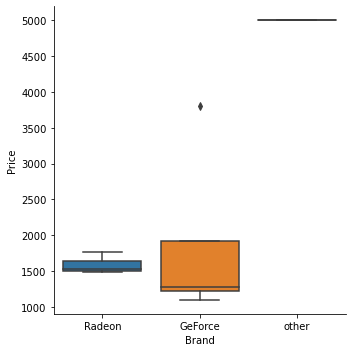

In [39]:
sns.catplot(x="Brand", y="Price", kind="box", data=graphics2_df)

In [ ]:
## Linear regression

Reference: https://seaborn.pydata.org/tutorial/regression.html

<AxesSubplot:xlabel='G3D Mark', ylabel='Price'>

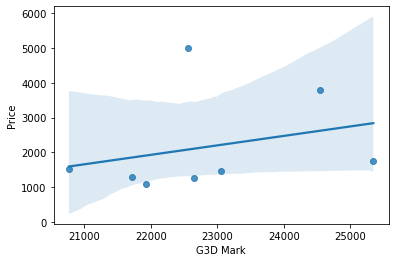

In [40]:
sns.regplot(x="G3D Mark", y="Price", data=graphics2_df)

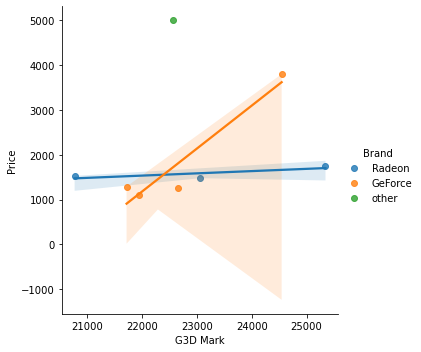

In [41]:
sns.lmplot(x="G3D Mark", y="Price", hue="Brand", data=graphics2_df)

# More on lists

- By index
- Slicing

In [49]:
nums = list(range(10, 101, 10)) # [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
first = nums[0] # 10
last = nums[len(nums) - 1] # correct, but not pythonic
last = nums[-1] # better... 100
index = 4
nums[index] # 50

50

# slicing

reference: https://www.geeksforgeeks.org/python-list/?ref=gcse#sl

list[first:last]

list[-xx]

In [55]:
middle = nums[3:7] # [40, 50, 60, 70]
start = nums[:3] # [10, 20, 30]
end = nums[7:] # [80, 90, 100]
last_one = nums[-1:]
last_three = nums[-3:] # same as nums[7:]

[80, 90, 100]

## extend

Adds a single thing. If adding a list, add it one element at a time. If adding a string, add it one character at a time. 

## append

I use this one more often.
If adding a list, add the entire list. If adding a string, add the entire string. 

## insert

Tell it where to insert the single thing.

## remove

Removes a particular element

## pop

Removes the last element *and* returns it.

In [72]:
lst1 = ['a', 'b', 'c', 'd']
lst2 = [1, 2, 3]

In [73]:
lst1.extend(lst2) # Returns a None
lst1

['a', 'b', 'c', 'd', 1, 2, 3]

In [74]:
appended = lst1.append(lst2)
appended  # pitfall: It's a None
lst1 # last element is [1, 2, 3]

['a', 'b', 'c', 'd', 1, 2, 3, [1, 2, 3]]

In [79]:
lst3 = ['apples', 'peaches', 'pumpkin']
lst4 = ['apples', 'peaches', 'pumpkin']
lst3.append('pie')
lst3

['apples', 'peaches', 'pumpkin', 'pie']

In [80]:
lst4.extend('pie')
lst4

['apples', 'peaches', 'pumpkin', 'p', 'i', 'e']

In [87]:
lst5 = list(range(10, 21, 5))
print(f'At the start, the list is: {lst5}')

pos = 0
lst5.insert(pos, 'first')
print(f'after inserting at position {pos}, the list is {lst5}')

pos = -1  # negative index goes from the end of the list, like slicing
lst5.insert(pos, 'penultimate')
print(f'after inserting at position {pos}, the list is {lst5}')

pos = 3
lst5.insert(pos, 'middle')
print(f'after inserting at position {pos}, the list is {lst5}')

At the start, the list is: [10, 15, 20]
after inserting at position 0, the list is ['first', 10, 15, 20]
after inserting at position -1, the list is ['first', 10, 15, 'penultimate', 20]
after inserting at position 3, the list is ['first', 10, 15, 'middle', 'penultimate', 20]


In [91]:
lst1 # ['a', 'b', 'c', 'd', 1, 2, 3, [1, 2, 3]]
lst1.remove('c')
lst1

['a', 'b', 'd', 1, 2, 3, [1, 2, 3]]

In [92]:
# What happens if I try to remove something that's not there?

lst1.remove('x')

ValueError: list.remove(x): x not in list

In [93]:
popped_this = lst1.pop()
print(f'I popped {popped_this} off the list. Now the list is {lst1}')

I popped [1, 2, 3] off the list. Now the list is ['a', 'b', 'd', 1, 2, 3]


## Iterating over lists

Fortran a C-like, with an index

Pythonic, accessing each element

Pythonic, Both index and element, with enumerate.

In [60]:
my_str = 'Elvtr'

for i in range(len(my_str)):
    print (f'{i}: {my_str[i]}')

0: E
1: l
2: v
3: t
4: r


In [61]:
for ch in my_str:
    print(ch)

E
l
v
t
r


In [62]:
for i, ch in enumerate(my_str):
    print (f'{i}: {ch}')

0: E
1: l
2: v
3: t
4: r


## Testing for an empty list

Can just use the list name in an if statement

In [95]:
def size_or_empty(lst: list):
    if lst:
        print(f'The list has {len(lst)} elements.')
    else:
        print('The list is empty.')
    return

empty_lst = []
regular_lst = [1, 2]

size_or_empty(empty_lst)
size_or_empty(regular_lst)

The list is empty.
The list has 2 elements.


In [97]:
lst_len = 5
lst6 = list(range(1, lst_len+1))
size_or_empty(lst6)

for i in range(lst_len):
    print(f'  popped: {lst6.pop()}')
    
size_or_empty(lst6)

The list has 5 elements.
  popped: 5
  popped: 4
  popped: 3
  popped: 2
  popped: 1
The list is empty.


In [99]:
lst_len = 3
lst7 = list(range(1, lst_len+1))
size_or_empty(lst7)

while lst7:
    print(f'  popped: {lst7.pop()}')

The list has 3 elements.
  popped: 3
  popped: 2
  popped: 1
